## GlucoSense- AI-Powered Diabetes Detection for Early Intervention

#### Title:

Identification of Diabetes in a person based on healthcare statistics.

#### Problem Statement:

Diabetes cases over the past fifteen years have bloomed all over the world. Lifestyle plays a very important role in it. In recent years, there has been an improvement in awareness regarding the health effects of diabetes. This has led to people getting themselves tested for diabetes than they would have earlier, as its risk can be reduced if it is predicted early.

### Import libraries


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

### Load the dataset

In [2]:
#load the dataset
data = pd.read_csv("diabetes_risk_prediction_dataset.csv")

### Exploratory Data Analysis

### Display Basic Information

In [3]:
#top 5 rows of dataset
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
#information about dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class

In [5]:
#shape of the dataset
print("Shape of the dataset")
print(data.shape)

Shape of the dataset
(520, 17)


In [6]:
#columns in the dataset
print("Columns in the dataset are:")
data.columns

Columns in the dataset are:


Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [7]:
#number of duplicate rows
print("Number of duplicate rows:")
print(data.duplicated().sum())

Number of duplicate rows:
269


In [8]:
#drop the duplicate rows
data=data.drop_duplicates()

In [9]:
print("statistics of every column")
data.describe(include='all')

statistics of every column


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,251.000000,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,Positive
freq,NaN,160,132,127,147,159,134,184,140,127,180,126,139,153,161,207,173
mean,48.864542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.526036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
              Age
count  251.000000
mean    48.864542
std     12.526036
min     16.000000
25%     39.000000
50%     48.000000
75%     58.000000
max     90.000000


In [11]:
#check for missing values
print("Missing Values in the Dataset:")
print(data.isnull().sum())

Missing Values in the Dataset:
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [12]:
data['class'].describe()

count          251
unique           2
top       Positive
freq           173
Name: class, dtype: object

In [13]:
print("Data type of each column")
print(data.dtypes)

Data type of each column
Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


### Outlier detection:

In [14]:
# Function to find outliers in a dataset using the IQR method
def find_outliers_iqr(data):
    outliers_dict = {}  
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)  # 1st quartile (25th percentile)
        Q3 = data[column].quantile(0.75)  # 3rd quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile Range
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers in the current column
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        # Store outliers in the dictionary
        outliers_dict[column] = outliers
        # Print outliers for the current column
        print(f"\nOutliers in '{column}':")
        print(outliers)
    return outliers_dict  # Return the dictionary containing outliers for each column
# Call the function to find outliers in the dataset 'data'
outliers = find_outliers_iqr(data)


Outliers in 'Age':
     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
102   90  Female       No        Yes                Yes       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
102            Yes             Yes     Yes           No              No   

    partial paresis muscle stiffness Alopecia Obesity     class  
102              No              Yes      Yes      No  Positive  


### Data overview:

Number of entries=520

Number of columns=17

The data contains mostly object datatype only age is int datatype.The above dataset doesn't contain any missing values.Most of the features have "No" value highest. There are some outliers in the dataset.There are 269 duplicate rows are present in the dataset.So we drop those rows and continue with analysis.

### Univariate Analysis

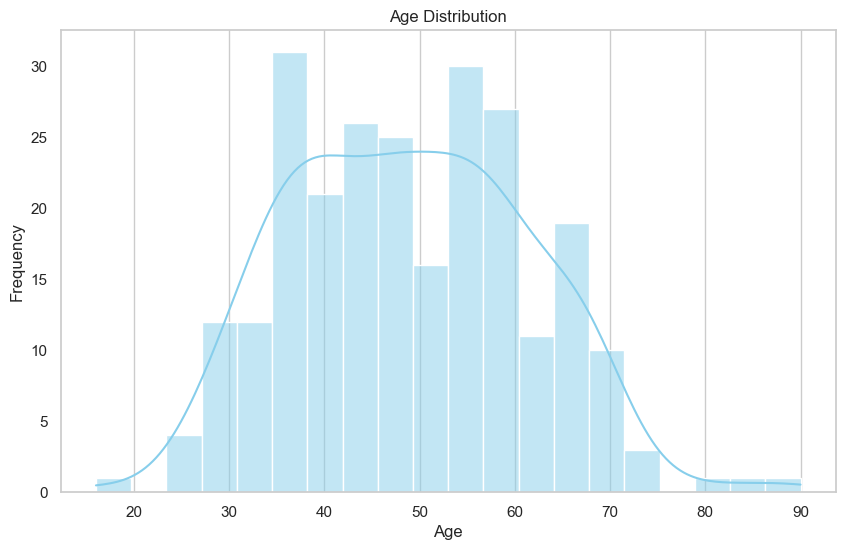

In [15]:
#histogram plot to show age distribution frequency
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

From the above graph it is clear that we have more data about people in between age group of 50-60 and 30-40. We have less data about the people in age group of <20 and >80.All the other age groups are evenly distributed.

### Bivariate Analysis

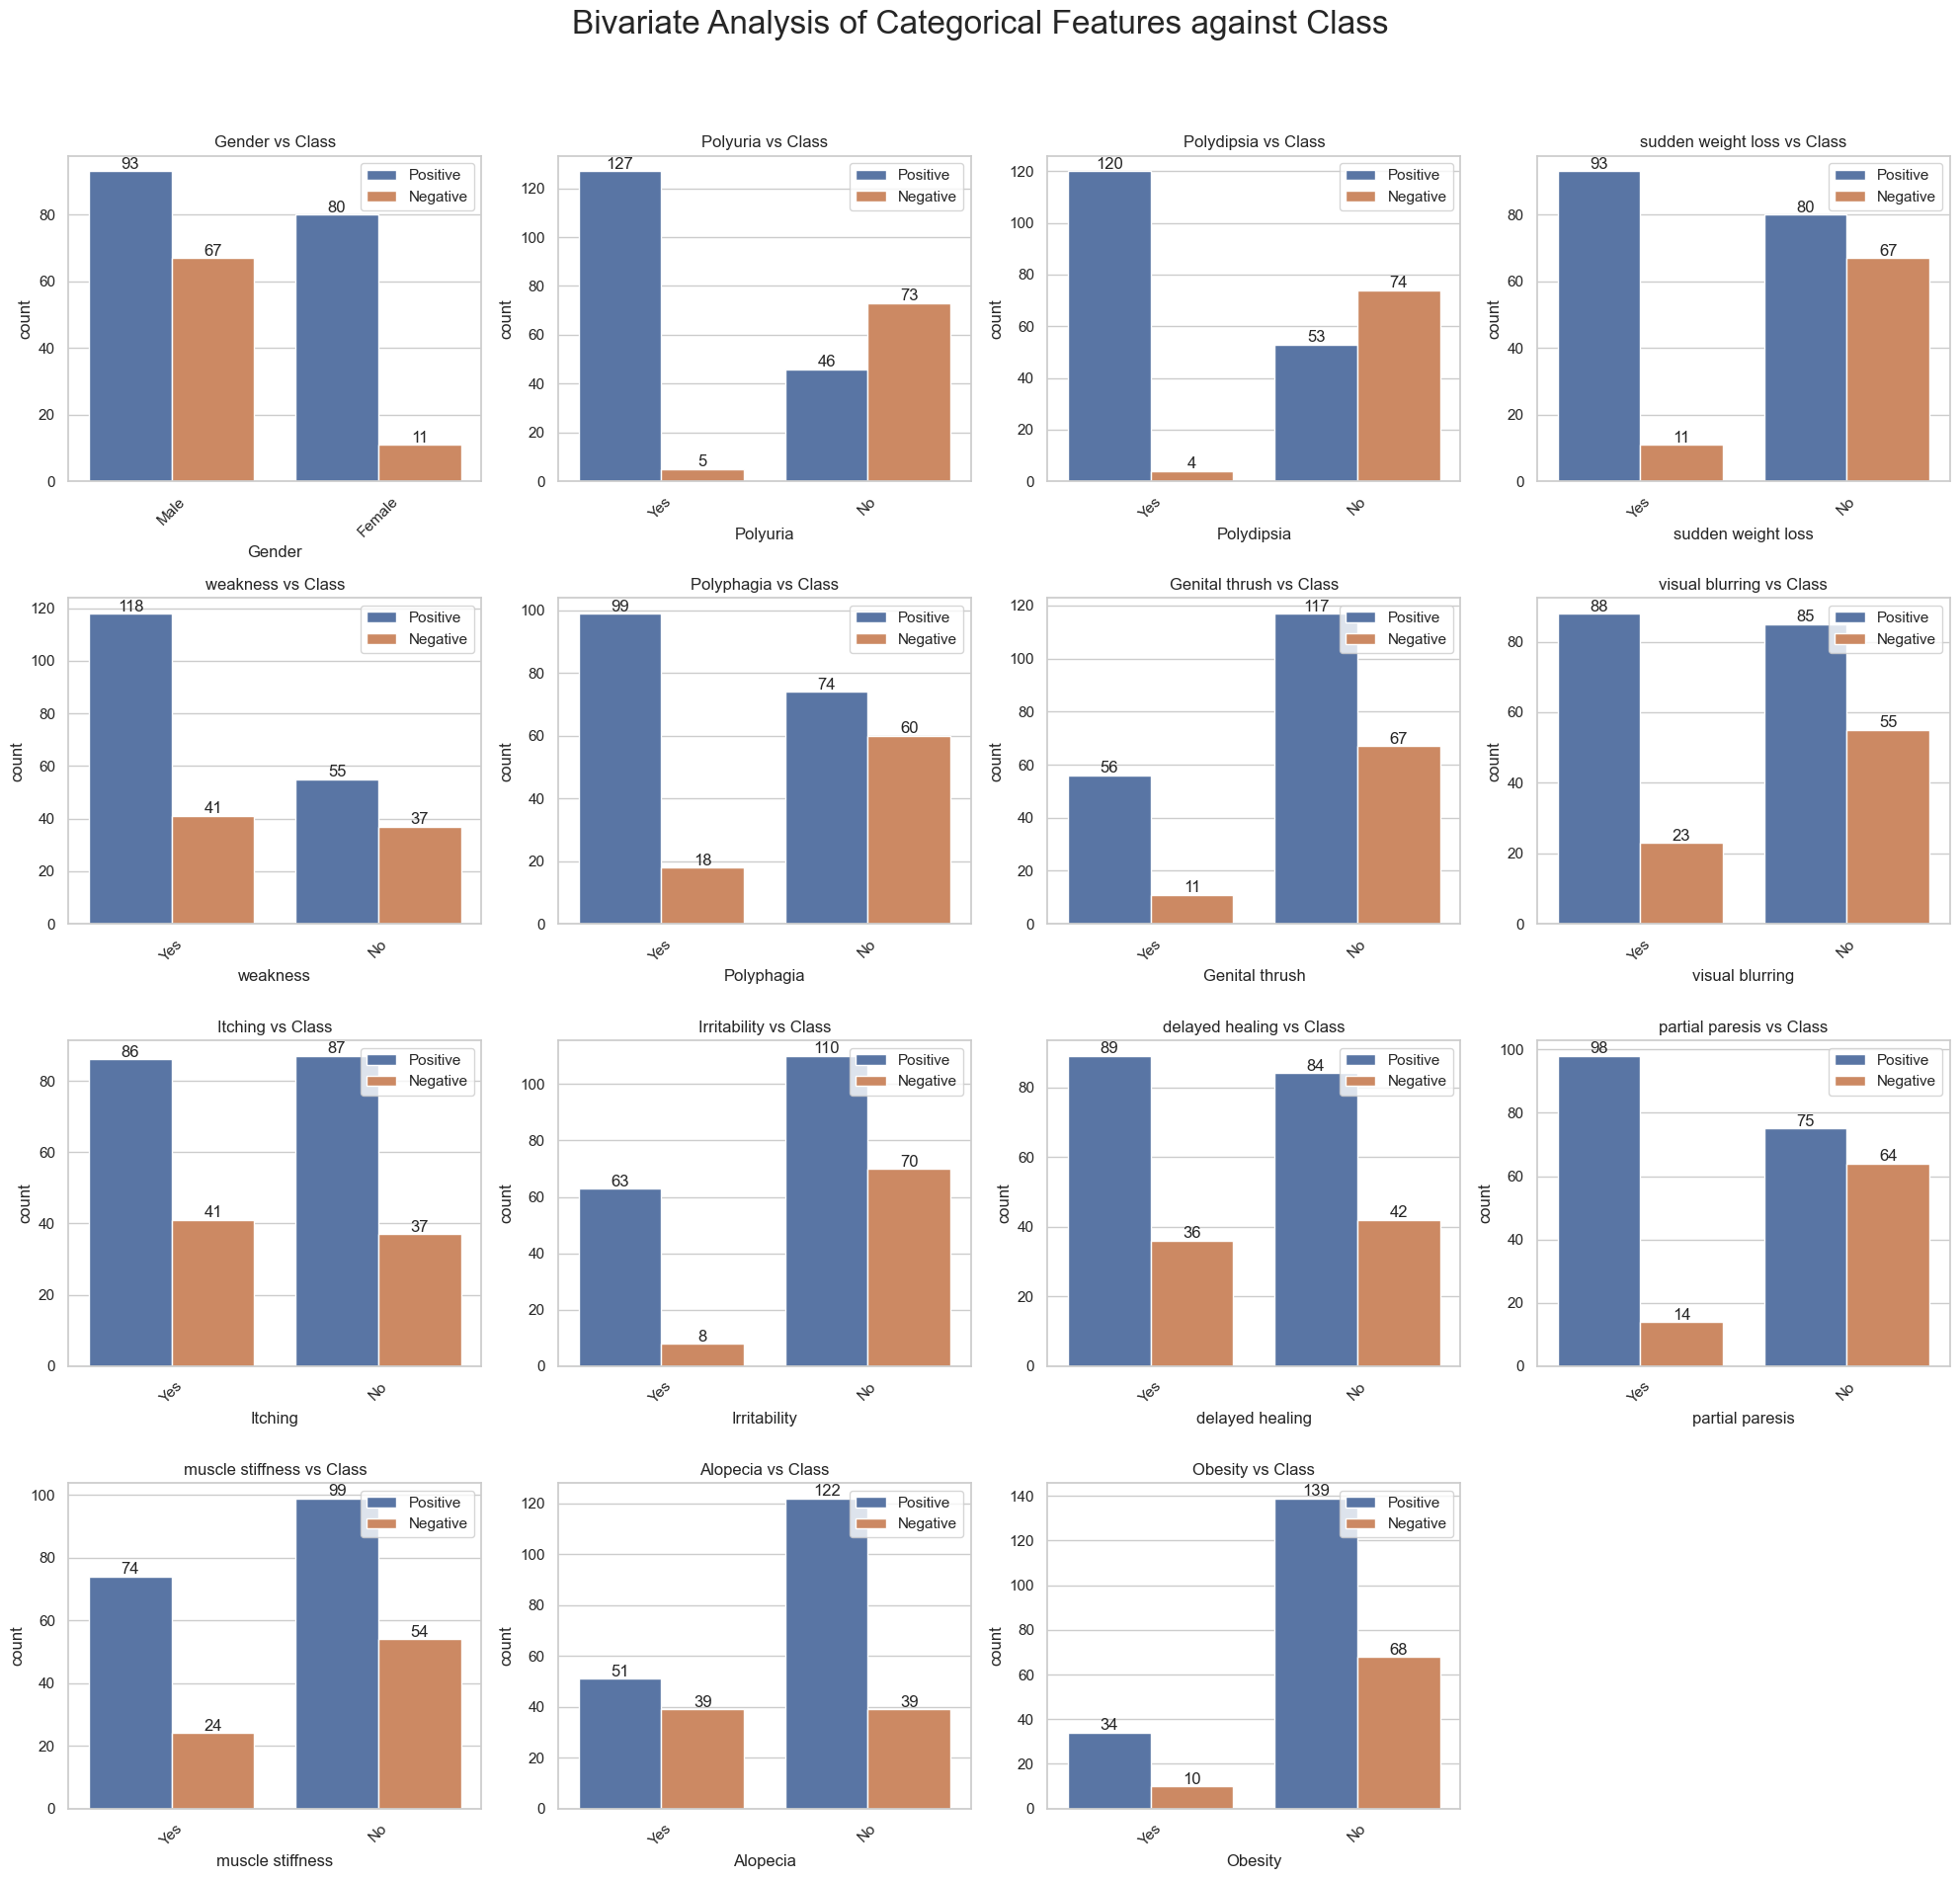

In [16]:
#Bivariate analysis of every feature with the target variable
important_features = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                      'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
                      'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
#placing 4 plots in each row
n_cols = 4  
n_rows = -(-len(important_features) // n_cols)  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
fig.suptitle('Bivariate Analysis of Categorical Features against Class', fontsize=24)
axes = axes.flatten()
for i, feature in enumerate(important_features):
    ax = axes[i]
    if i == 0:
        plot = sns.countplot(data=data, x=feature, hue='class', ax=ax)
    else:
        plot = sns.countplot(data=data, x=feature, hue='class', ax=ax, order=["Yes", "No"])
    ax.set_title(f'{feature} vs Class')
    ax.tick_params(axis='x', rotation=45)
    for p in plot.patches:
        height = p.get_height()
        if height > 0:  
            plot.annotate(f'{int(height)}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 5), textcoords='offset points')
    plot.legend(loc='upper right')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### Gender:
The distribution of diabetes is relatively balanced across genders, but slightly higher among males with a greater proportion of "Positive" cases than females.

##### Polyuria (excessive urination):
A high percentage of "Positive" cases show the presence of polyuria, whereas the majority of "Negative" cases do not. This suggests polyuria is a strong indicator of diabetes.

##### Polydipsia (excessive thirst):
Similar to polyuria, most "Positive" cases report polydipsia, while most "Negative" cases do not. This is another strong distinguishing factor for diabetes.

##### Sudden Weight Loss:
Many "Positive" cases report sudden weight loss, while this symptom is uncommon among "Negative" cases. This reinforces the association between sudden weight loss and diabetes.

##### Weakness:
Weakness is commonly reported by "Positive" cases, though some "Negative" cases also report it. This suggests that while weakness is more prevalent among diabetics, it may not be as strong an indicator as polyuria or polydipsia.

##### Polyphagia (excessive hunger):
Polyphagia is more common in "Positive" cases compared to "Negative" ones, indicating it could be a helpful indicator of diabetes.

##### Genital Thrush:
Genital thrush is present in a significant portion of "Positive" cases but is relatively rare among "Negative" cases. This suggests it may be associated with diabetes, though it's not as prevalent as polyuria or polydipsia.

##### Visual Blurring:
Many "Positive" cases experience visual blurring, while it’s less common in "Negative" cases. This indicates a link between diabetes and vision issues.

##### Itching:
There is a notable difference in the prevalence of itching between "Positive" and "Negative" cases, with itching more common in diabetics.

##### Irritability:
Irritability appears slightly more common among "Positive" cases compared to "Negative" ones, though the difference is less pronounced than with other features.

##### Delayed Healing:
Delayed healing is frequently observed in "Positive" cases and less so in "Negative" ones, indicating it may be another relevant symptom for diabetes.

##### Partial Paresis (muscle weakness):
Partial paresis is more common in "Positive" cases than in "Negative" cases, which suggests a possible association with diabetes.

##### Muscle Stiffness:
This feature shows some prevalence among diabetics, though it's also present to a degree in "Negative" cases, making it a moderate indicator.

##### Alopecia (hair loss):
Alopecia is slightly more common in "Positive" cases, but the difference is not as pronounced, suggesting it may not be a strong indicator.

##### Obesity:
Obesity shows up in both "Positive" and "Negative" cases, indicating it may not be as strong an indicator on its own. However, it could still be a relevant risk factor in combination with other symptoms.

#### Summary

The features polyuria, polydipsia, sudden weight loss, weakness, and genital thrush show strong distinctions between diabetic and non-diabetic cases, suggesting these are particularly indicative of diabetes.

Visual blurring, itching, delayed healing, and polyphagia also demonstrate significant differences and are likely valuable indicators.

Features like irritability, partial paresis, and muscle stiffness are moderately associated with diabetes.

Gender, alopecia, and obesity appear less indicative on their own but may be relevant when combined with other features.

### Corelation Matrix

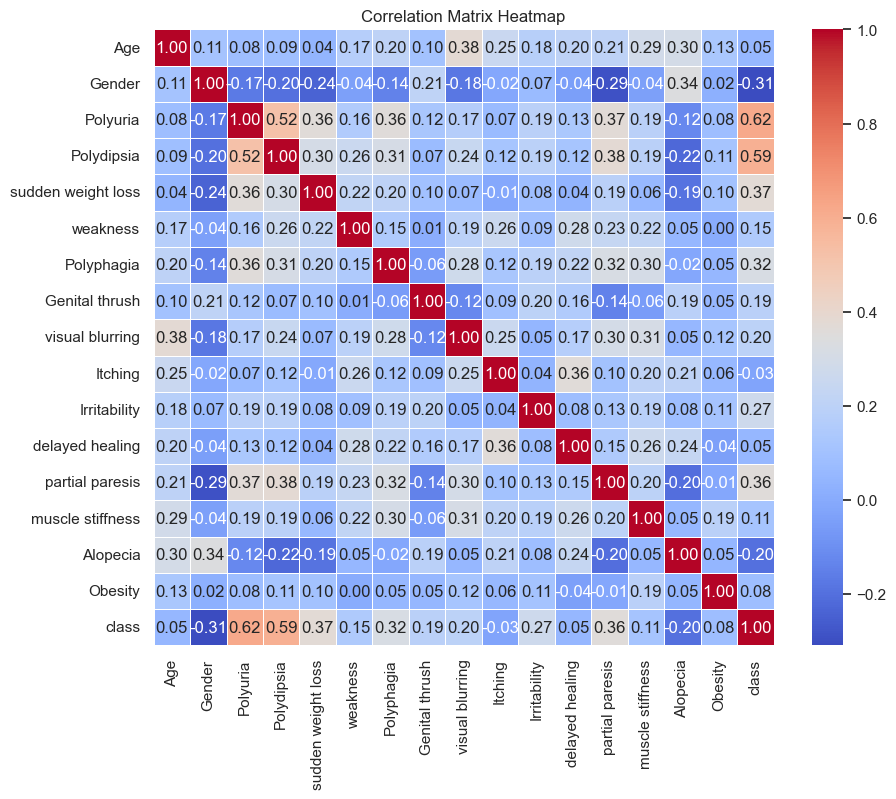

In [17]:
# Create a copy of the original dataframe to avoid modifying it
df_encoded = data.copy()
# Dictionary to store label encoders for categorical columns
label_encoders = {}
# Loop through columns and encode categorical features
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':  # Check for categorical columns
        label_encoders[column] = LabelEncoder()  # Initialize encoder
        df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])  # Apply encoding
# Compute the correlation matrix for the encoded dataframe
correlation_matrix = df_encoded.corr()
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')  # Set the title
plt.show()  # Display the heatmap

The top features that are highly correlated with target variable are:

#### High Positive Correlations:
Polyuria and Polydipsia have a strong positive correlation , suggesting these symptoms often co-occur.
Polyuria and class : Polyuria shows a strong positive correlation with diabetes presence.
Polydipsia and class : Similarly, Polydipsia is also strongly correlated with the class, indicating that it may be an important feature for diabetes prediction.

#### High Negative Correlations:
No strong negative correlations were found.

#### Top Correlated Features with the Target (class):
Polyuria: 0.62 (strongest predictor of diabetes presence).
Polydipsia: 0.59 (second strongest predictor).
Sudden Weight Loss: 0.37 (moderate correlation with diabetes presence).

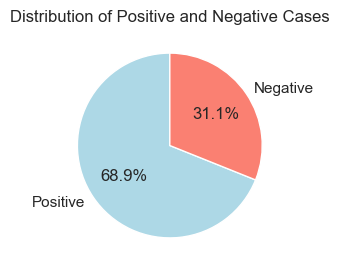

In [18]:
class_counts = data['class'].value_counts()
plt.figure(figsize=(3, 3))
# Create a pie chart to visualize the distribution of positive and negative cases
# Labels are the class values, autopct displays percentage, startangle rotates the chart, colors set the color scheme
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Distribution of Positive and Negative Cases')
plt.show()

We have more positive cases i.e.,61.5% than negative cases i.e.,38.5%

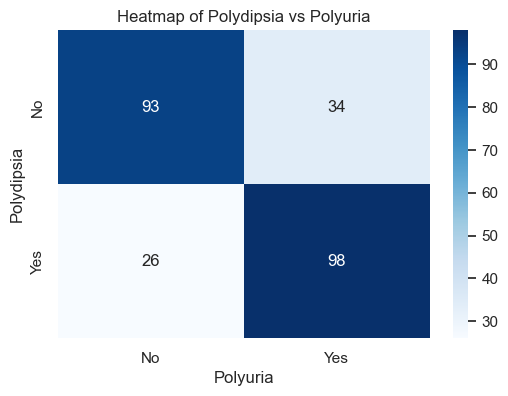

In [19]:
# Create a contingency table (cross-tabulation) for the relationship between Polydipsia and Polyuria
contingency_table = pd.crosstab(data['Polydipsia'], data['Polyuria'])
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Polydipsia vs Polyuria')
plt.xlabel('Polyuria')
plt.ylabel('Polydipsia')
plt.show()

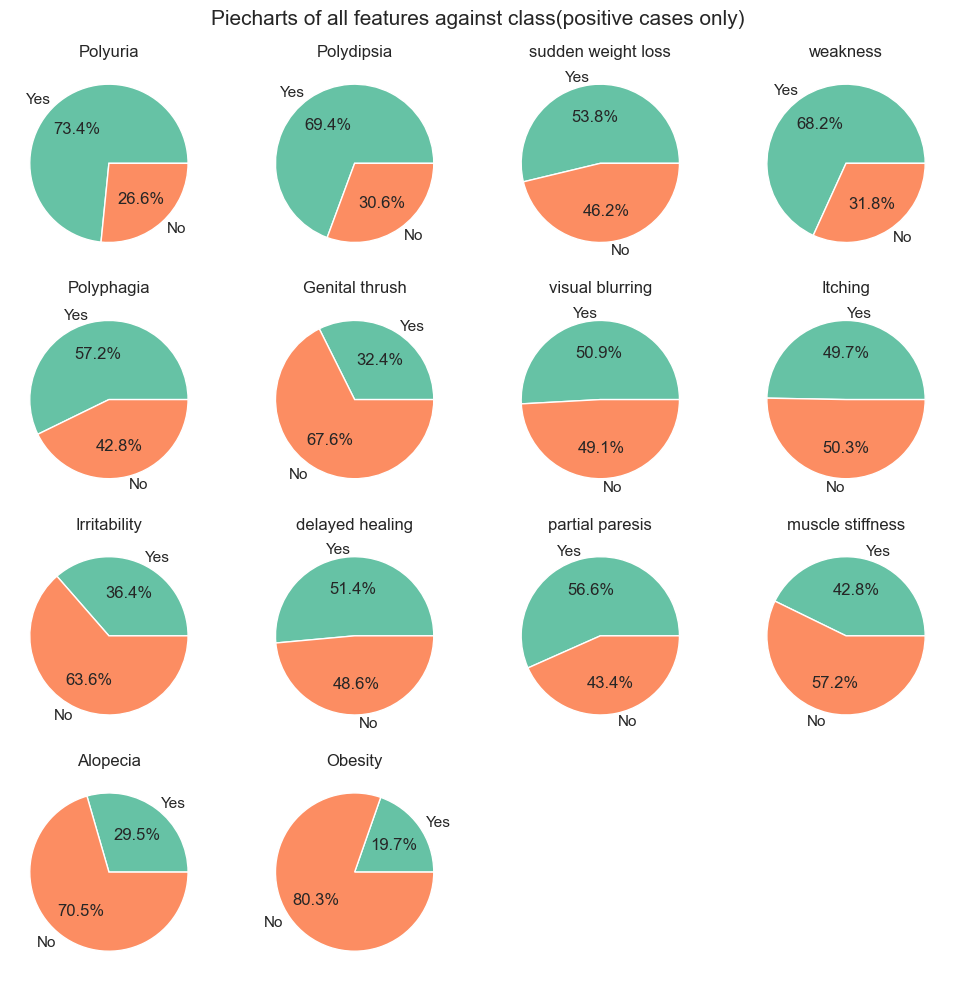

In [20]:
yes_color = '#66c2a5'
no_color = '#fc8d62'
colors = [yes_color, no_color]
# List of binary features to create pie charts for
binary_features = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                   'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                   'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 
                   'Alopecia', 'Obesity']
# Filter the dataset to only include positive diabetes cases
positive_diabetes = data[data['class'] == 'Positive']
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
fig.suptitle("Piecharts of all features against class(positive cases only)", fontsize=15)
axes = axes.flatten()
# Loop through each feature to create pie charts
for i, feature in enumerate(binary_features):
    counts = positive_diabetes[feature].value_counts()
    counts = counts.reindex(['Yes', 'No'], fill_value=0)  
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)  
    axes[i].set_title(feature) 
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  
plt.tight_layout()
plt.show()

#### High Prevalence of Certain Symptoms:
Features like Polyuria, Polydipsia, weakness, and sudden weight loss show a high percentage of "Yes" responses among individuals with diabetes. This suggests that these symptoms are strongly associated with positive diabetes cases.

#### Moderate Association with Other Symptoms:
Conditions such as visual blurring, delayed healing, Itching, and partial paresis have a balanced distribution of "Yes" and "No" responses, indicating they may be common but not universal among those with diabetes.

#### Low Association for Certain Symptoms:
Some symptoms, like Alopecia and Genital thrush, have a lower percentage of "Yes" responses, implying these are less frequently observed in individuals with diabetes in this dataset. This may suggest a weaker correlation between these symptoms and diabetes.

#### Potential Indicators of Severe Cases:
Symptoms like Polyuria, Polydipsia, and sudden weight loss appear very prominently (mostly "Yes" responses). These could be key indicators to flag or prioritize in diabetes screening, as they are more common in positive cases.

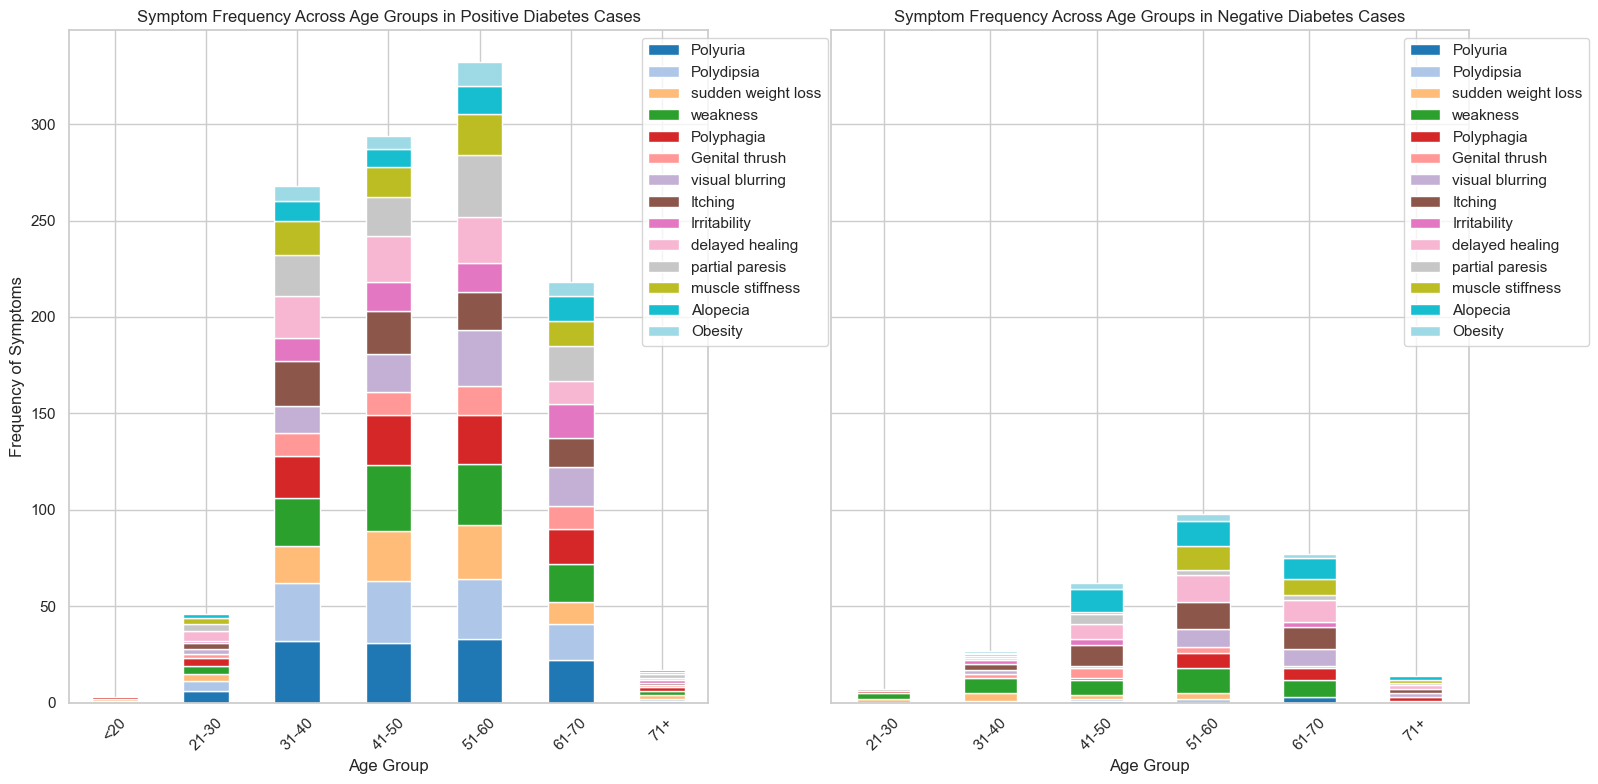

In [21]:
binary_features = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                   'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                   'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 
                   'Alopecia', 'Obesity']
positive_diabetes_copy = data[data['class'] == 'Positive'].copy()
negative_diabetes_copy = data[data['class'] == 'Negative'].copy()
age_bins = [0, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['<20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
# Create a new 'Age Group' column based on age ranges for both positive and negative cases
positive_diabetes_copy['Age Group'] = pd.cut(positive_diabetes_copy['Age'], bins=age_bins, labels=age_labels)
negative_diabetes_copy['Age Group'] = pd.cut(negative_diabetes_copy['Age'], bins=age_bins, labels=age_labels)
# Group by 'Age Group' and count the frequency of 'Yes' values for each symptom in positive cases
age_symptom_counts_positive = positive_diabetes_copy.groupby('Age Group', observed=True)[binary_features].apply(lambda x: (x == 'Yes').sum())
# Group by 'Age Group' and count the frequency of 'Yes' values for each symptom in negative cases
age_symptom_counts_negative = negative_diabetes_copy.groupby('Age Group', observed=True)[binary_features].apply(lambda x: (x == 'Yes').sum())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
age_symptom_counts_positive.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')
ax1.set_title('Symptom Frequency Across Age Groups in Positive Diabetes Cases')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Frequency of Symptoms')
ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  
ax1.tick_params(axis='x', rotation=45)  
# Plot stacked bar chart for negative diabetes cases
age_symptom_counts_negative.plot(kind='bar', stacked=True, ax=ax2, colormap='tab20')
ax2.set_title('Symptom Frequency Across Age Groups in Negative Diabetes Cases')
ax2.set_xlabel('Age Group')
ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  # Move legend outside the plot
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
# Adjust layout to prevent overlapping and ensure plots are well spaced
plt.tight_layout()
plt.show()

### Symptom Frequency in Positive Diabetes Cases:
##### Prevalence Across Age Groups: 
Symptoms are more frequently observed in the 40–60 age range for individuals with diabetes, indicating a higher incidence of diabetes-related symptoms in middle-aged groups.
#### Top Symptoms:
##### Polyuria and Polydipsia: 
These symptoms are consistently higher across most age groups, particularly among middle-aged individuals, reinforcing their importance as diabetes indicators.
##### Weakness and sudden weight loss: 
These symptoms show a noticeable frequency, especially in the 31-50 age groups, suggesting they could be predictive features for early detection in younger adults.
##### Elderly Groups: 
The 60+ age group also shows a high frequency of symptoms, but with fewer cases compared to the middle-aged group, possibly due to fewer data samples or natural attrition of health in older age groups.
### Symptom Frequency in Negative Diabetes Cases
##### Lower Overall Symptom Frequency: 
For individuals without diabetes, symptoms like Polyuria and Polydipsia are notably less frequent across all age groups, confirming that these symptoms are strongly associated with diabetes.
##### Age Group Variability: 
Unlike positive cases, symptom frequencies do not show a strong age dependency and are relatively consistent across age groups, suggesting that these symptoms may not be common in non-diabetic individuals.
##### Symptom Occurrence: 
Symptoms such as Alopecia and Obesity show some presence across age groups even in negative cases, indicating that these factors might be influenced by other conditions not directly related to diabetes.
### Comparative Age Group Trends
##### Higher Symptom Rates in Middle Age for Diabetics: 
Positive diabetes cases exhibit a peak in symptoms in the 40-60 age range, while negative cases do not show such a peak, reinforcing that this age group is a critical period for diabetes management and intervention.
Young and Elderly Groups: Both positive and negative cases show fewer symptoms in <20 and 70+ age groups, possibly due to fewer data points in these age brackets or lower incidence.

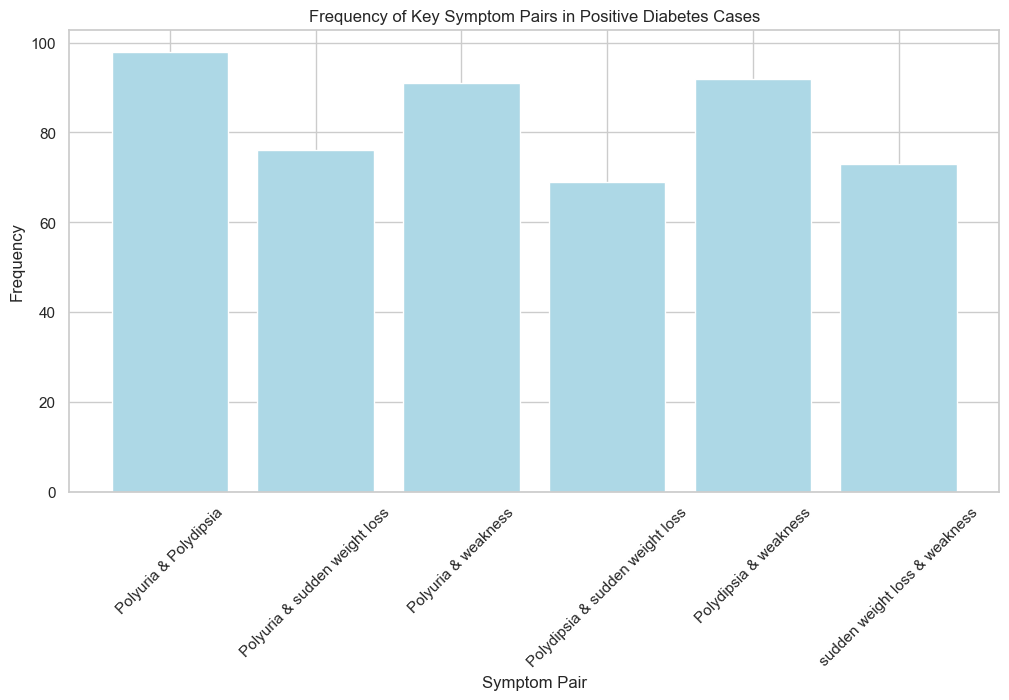

In [22]:
key_symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness']
symptom_pairs = list(combinations(key_symptoms, 2))
# Dictionary to store counts for each symptom pair
pair_counts = {}
for pair in symptom_pairs:
    count = positive_diabetes[(positive_diabetes[pair[0]] == 'Yes') & (positive_diabetes[pair[1]] == 'Yes')].shape[0]
    pair_counts[f"{pair[0]} & {pair[1]}"] = count  # Store count in dictionary with pair as key
plt.figure(figsize=(12, 6))
plt.bar(pair_counts.keys(), pair_counts.values(), color='lightblue')
plt.title('Frequency of Key Symptom Pairs in Positive Diabetes Cases')
plt.xlabel('Symptom Pair')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The graph shows the frequency of symptom pairs in positive diabetes cases, with the following insights:

##### Polyuria & Polydipsia: 
This pair has the highest frequency, suggesting that frequent urination and excessive thirst often co-occur in positive diabetes cases.
##### Polyuria & weakness and Polydipsia & weakness: 
These pairs highlighting the prevalence of weakness alongside Polyuria and Polydipsia in diabetic individuals.
##### Polyuria & sudden weight loss and Polydipsia & sudden weight loss: 
Weight loss also frequently co-occurs with Polyuria and Polydipsia, indicating it as a significant symptom in diabetes cases.

### Standardize data types

Standardizing data types ensures consistency and simplifies data processing.The process involves:

##### Categorical Data: 
Converting columns with discrete values (e.g., "Yes", "No", or categories like "Male", "Female") into a standard format, such as the category type. This reduces memory usage and speeds up operations.

##### Numerical Data: 
Ensuring all numerical data, whether integers or floats, are stored in a consistent format (e.g., float). This prevents errors during computations or scaling.

##### Uniformity Across Dataset: 
A consistent data type for similar data makes operations like statistical analysis, machine learning, and visualization more reliable and efficient.

In [23]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype(str)
    else:
        data[col] = data[col].astype(float)

In [24]:
# Identify columns with categorical data types ('object' or 'category')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()  # Initialize a new LabelEncoder
    data[col] = le.fit_transform(data[col])  # Apply label encoding to the column
    label_encoders[col] = le  # Store the encoder in the dictionary
# Convert all columns to float data type for numerical computations
data = data.astype(float)

In [25]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,58.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,45.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Scaling the data

Min-Max Scaling (or normalization) is a data preprocessing technique that transforms data to a fixed range, typically [0, 1]. It ensures that all feature values are scaled proportionally without distorting their relationships. This is particularly useful for machine learning algorithms sensitive to feature magnitude.

In [26]:
#scaling the data
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])

### Feature selection using chi square test

Using the Chi-Square test for feature selection is a powerful approach, especially for datasets with categorical variables. It helps identify which features are significantly associated with the target variable, allowing for the construction of more effective predictive models by focusing on the most relevant features.

In [27]:
# Define the target column ('class') and separate features (X) and target (y)
target_column = 'class'
X = data.drop(columns=[target_column])  
y = data[target_column]  
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()  
    X[col] = le.fit_transform(X[col]) 
X = X.astype(float)  
# Initialize the SelectKBest method with the chi-square test as the score function
chi2_selector = SelectKBest(score_func=chi2, k='all')  
chi2_selector.fit(X, y)
chi2_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)
# Print the feature selection results using the chi-square test
print("Feature Selection using Chi-Square Test:")
print(chi2_scores)

Feature Selection using Chi-Square Test:
               Feature  Chi2 Score
2             Polyuria   45.890026
3           Polydipsia   44.903006
4   sudden weight loss   20.403086
12     partial paresis   18.043260
6           Polyphagia   13.449259
10        Irritability   13.006198
1               Gender    8.712006
7       Genital thrush    6.720759
14            Alopecia    6.313391
8      visual blurring    5.556841
5             weakness    2.077010
13    muscle stiffness    1.984555
15             Obesity    1.431754
11     delayed healing    0.302236
9              Itching    0.086492
0                  Age    0.044684


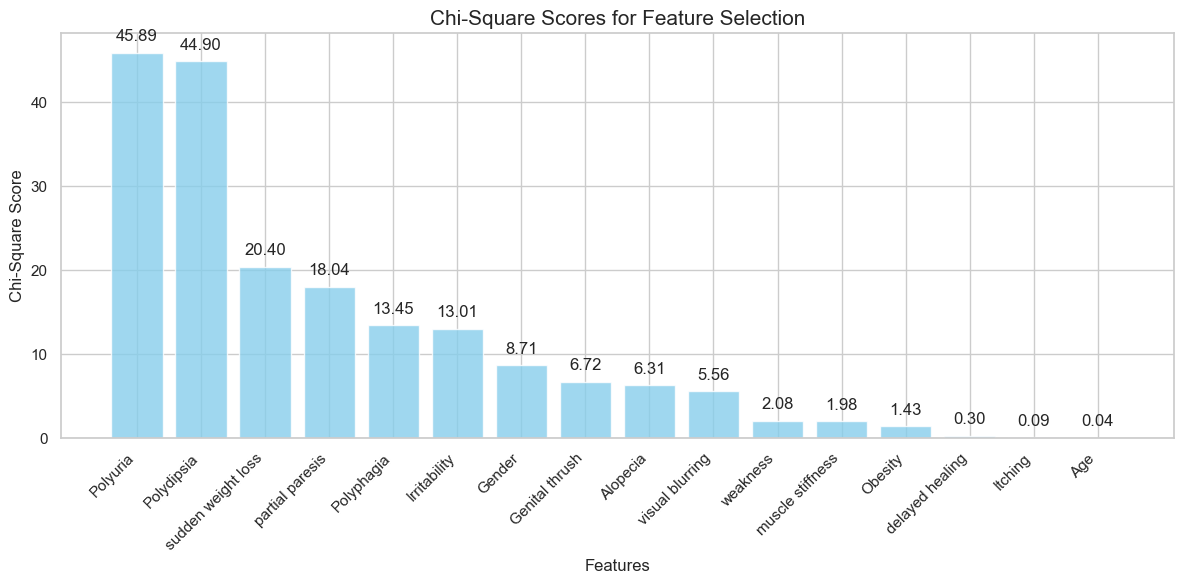

In [28]:
plt.figure(figsize=(12, 6))
# Create a bar chart to visualize the Chi-Square scores for each feature
bars = plt.bar(chi2_scores['Feature'], chi2_scores['Chi2 Score'], color='skyblue', alpha=0.8)
for bar, score in zip(bars, chi2_scores['Chi2 Score']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height() + 1,             
        f'{score:.2f}',                   
        ha='center', va='bottom', fontsize=12  
    )
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Chi-Square Score')
plt.title('Chi-Square Scores for Feature Selection', fontsize=15)
plt.tight_layout()
plt.show()

Based on the above chi square test score we can say that

#### Top Features:
Polyuria and Polydipsia have the highest Chi-square scores (~45.89 and ~44.90). These are the most strongly associated with the target variable, likely critical for predictions.
Sudden weight loss and Partial paresis also show strong relevance (scores ~20.40 and ~18.04).

#### Moderate Features:
Polyphagia, Irritability, and Genital thrush have moderate scores (~8–13). They may be relevant but less impactful compared to the top features.

#### Low-Impact Features:
Weakness, Muscle stiffness, and Obesity have low scores (<2.5), suggesting weaker associations with the target.
Delayed healing, Itching, and Age have negligible scores, likely not useful for prediction.

### Dimensionality Reduction using PCA analysis

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms a high-dimensional dataset into a lower-dimensional space while retaining most of the dataset's variance. PCA is widely used in machine learning and data preprocessing to simplify data, reduce noise, and mitigate the curse of dimensionality.

In [29]:
# Scale the features (X) using the specified scaler (e.g., StandardScaler)
X_scaled = scaler.fit_transform(X)
# Initialize the PCA (Principal Component Analysis) model
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
# Find the number of components that explain at least 95% of the variance
n_components = (cumulative_variance < 0.95).sum() + 1  
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 14


#### Output: 
The code gives the number of principal components (features) required to explain 95% of the variance in the data. Here the number of components is 14.

#### Actionable Steps:
But in this case we only have 17 features in which one is target feature and we remain with 16 features after performing PCA we get to know that 14 features are essential to retain 95% data. So there is no need to perform dimensionality reduction in this case

### Divide target columns from data

In [30]:
X=data.drop(columns=['class'])
y=data['class']

### Train test split

In [31]:
#divide train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (200, 16)
Shape of X_test: (51, 16)
Shape of y_train: (200,)
Shape of y_test: (51,)


We split the data into training data and testing data we take 20% of data as testing data all the remaining data is considered as training data.The shape of X_train is (200,16) and X_test is (51,16).

### Model Selection

Models to apply on the dataset:

Logistic regression

Decision Tree

Support Vector Machine

Random forest

XGBoost

Extra trees

Gradient Boosting

### Define models

In [33]:
# Define a dictionary of models to be used for classification
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric="logloss")
}

In [34]:
results = []
for model_name, model in models.items():
    # Train the model using the training data (X_train and y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # If the model supports probability predictions, get the probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    # Calculate key performance metrics
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)  
    f1 = f1_score(y_test, y_pred)  
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None 
    # Store the performance metrics in a dictionary for each model
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    })
# Convert the results list to a DataFrame for better readability
results_df = pd.DataFrame(results)
# Display the results DataFrame
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.823529,0.825000,0.942857,0.880000,0.944643
1,Decision Tree,0.882353,0.891892,0.942857,0.916667,0.846429
2,Support Vector Machine,0.901961,0.894737,0.971429,0.931507,0.971429
3,Random Forest,0.921569,0.918919,0.971429,0.944444,0.975893
4,Gradient Boosting,0.901961,0.894737,0.971429,0.931507,0.951786
5,Extra Trees,0.921569,0.918919,0.971429,0.944444,0.989286
6,XGBoost,0.882353,0.891892,0.942857,0.916667,0.951786


From the table, we can say that:

##### Random Forest and Extra Trees: 
Both have the highest accuracy (0.9216) and F1 score (0.9444), indicating strong overall performance. Extra Trees has the best AUC (0.9893), reflecting better ability to distinguish between classes.

##### Support Vector Machine (SVM) and Gradient Boosting: 
Perform slightly worse than Random Forest and Extra Trees in accuracy (0.902) and F1 score (0.9315). AUC scores are still strong at 0.9714 and 0.9518, respectively.

##### Decision Tree and XGBoost: 
Both show moderate performance with an accuracy of 0.8824, F1 score of 0.9167, and AUC around 0.8464 (Decision Tree) and 0.9518 (XGBoost).

##### Logistic Regression: 
|Has the lowest scores across all metrics, with accuracy at 0.8235 and F1 score at 0.8800. However, its AUC is decent (0.9446).

### Hyperparameter tuning

#### Logistic Regression:

In [35]:
results=[]

In [36]:
# Define the hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],  
    'solver': ['liblinear', 'lbfgs']  
}
# Initialize the Logistic Regression model with max iterations set to 500 and random state for reproducibility
lr = LogisticRegression(max_iter=500, random_state=42)
# Perform GridSearchCV to search for the best hyperparameters using 5-fold cross-validation and 'f1' scoring
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
# Fit the GridSearchCV model to the training data
grid_search_lr.fit(X_train, y_train)
# Get the best model (Logistic Regression) from GridSearchCV
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")

Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}


In [37]:
# Calculate and display various performance metrics for the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
auc = roc_auc_score(y_test, y_prob_lr)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8627
Precision: 0.8500
Recall: 0.9714
F1 Score: 0.9067
AUC: 0.9500


In [38]:
results.append({
    "Model": "Logistic regression",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC":auc
})

#### Decision Tree Hyperparameter Tuning:

In [39]:
param_grid_dt = {
    'max_depth': [5, 10, 15],              
    'min_samples_split': [2, 5, 10],       
    'criterion': ['gini', 'entropy']       
}
# Initialize the Decision Tree classifier with a fixed random state for reproducibility
dt = DecisionTreeClassifier(random_state=42)
# Perform GridSearchCV to search for the best hyperparameters using 5-fold cross-validation and 'f1' scoring
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
# Retrieve the best Decision Tree model found by GridSearchCV
best_dt = grid_search_dt.best_estimator_
# Make predictions on the test data using the best Decision Tree model
y_pred_dt = best_dt.predict(X_test)
print(f"Best Parameters for Decision Tree: {grid_search_dt.best_params_}")

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


In [40]:
# Calculate and display various performance metrics for the decision tree model
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8824
Precision: 0.8919
Recall: 0.9429
F1 Score: 0.9167


In [41]:
results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC":auc
})

####  Support Vector Machine (SVM) Hyperparameter Tuning:

In [42]:
# Define the hyperparameter grid for Support Vector Classifier (SVC)
param_grid_svc = {
    'C': [0.1, 1, 10],           
    'kernel': ['linear', 'rbf'],   
    'gamma': ['scale', 'auto']    
}
svc = SVC(random_state=42, probability=True)
# Perform GridSearchCV to find the best hyperparameters using 5-fold cross-validation and 'f1' scoring
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='f1', n_jobs=-1)
grid_search_svc.fit(X_train, y_train)
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
y_prob_svc = best_svc.predict_proba(X_test)[:, 1]
print(f"Best Parameters for SVM: {grid_search_svc.best_params_}")

Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [43]:
# Calculate and display various performance metrics for the support vector machine model
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
auc = roc_auc_score(y_test, y_prob_svc)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8824
Precision: 0.8718
Recall: 0.9714
F1 Score: 0.9189
AUC: 0.9679


In [44]:
results.append({
    "Model": "SVM",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC":auc
})

#### Random Forest Hyperparameter Tuning:

In [45]:
# Define the hyperparameter grid for Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],       
    'max_depth': [5, 10, 20],             
    'min_samples_split': [2, 5, 10]       
}
# Initialize the Random Forest Classifier with a fixed random state for reproducibility
rf = RandomForestClassifier(random_state=42)
# Perform GridSearchCV to search for the best hyperparameters using 5-fold cross-validation and 'f1' scoring
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [46]:
# Calculate and display various performance metrics for the random forest model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_prob_rf)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.9020
Precision: 0.9167
Recall: 0.9429
F1 Score: 0.9296
AUC: 0.9777


In [47]:
results.append({
    "Model": "Random forest",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC":auc
})

#### Gradient Boosting Hyperparameter Tuning:

In [48]:
# Define the hyperparameter grid for Gradient Boosting Classifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],     
    'learning_rate': [0.01, 0.1, 0.2],   
    'max_depth': [3, 5, 10]              
}
# Initialize the Gradient Boosting Classifier with a fixed random state for reproducibility
gb = GradientBoostingClassifier(random_state=42)
# Perform GridSearchCV to find the best hyperparameters using 5-fold cross-validation and 'f1' scoring
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='f1', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
y_prob_gb = best_gb.predict_proba(X_test)[:, 1]
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")

Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [49]:
# Calculate and display various performance metrics for the gradient boosting model
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
auc = roc_auc_score(y_test, y_prob_gb)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8627
Precision: 0.8889
Recall: 0.9143
F1 Score: 0.9014
AUC: 0.9500


In [50]:
results.append({
    "Model": "Gradient Boosting",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC":auc
})

#### Extra Trees Hyperparameter Tuning:

In [51]:
param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
et = ExtraTreesClassifier(random_state=42)
grid_search_et = GridSearchCV(et, param_grid_et, cv=5, scoring='f1', n_jobs=-1)
grid_search_et.fit(X_train, y_train)
best_et = grid_search_et.best_estimator_
y_pred_et = best_et.predict(X_test)
y_prob_et = best_et.predict_proba(X_test)[:, 1]
print(f"Best Parameters for Extra Trees: {grid_search_et.best_params_}")

Best Parameters for Extra Trees: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [52]:
# Calculate and display various performance metrics for the extra trees model
accuracy = accuracy_score(y_test, y_pred_et)
precision = precision_score(y_test, y_pred_et)
recall = recall_score(y_test, y_pred_et)
f1 = f1_score(y_test, y_pred_et)
auc = roc_auc_score(y_test, y_prob_et)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.9216
Precision: 0.9189
Recall: 0.9714
F1 Score: 0.9444
AUC: 0.9839


In [53]:
results.append({
    "Model": "Extra trees",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC":auc
})

#### XGBoost Hyperparameter Tuning:

In [54]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
xgb = XGBClassifier(random_state=42, eval_metric="logloss")
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [55]:
# Calculate and display various performance metrics for the XGBoost model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_prob_xgb)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.9020
Precision: 0.8947
Recall: 0.9714
F1 Score: 0.9315
AUC: 0.9518


In [56]:
results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC":auc
})

### Evaluation of performance metrics

#### Accuracy:
The ratio of correctly predicted instances to the total instances, indicating overall correctness.

#### Precision:
The ratio of true positive predictions to the total predicted positives, measuring the accuracy of positive predictions.

#### Recall (Sensitivity):
The ratio of true positive predictions to the total actual positives, indicating the model's ability to identify all relevant instances.

#### F1 Score:
The harmonic mean of precision and recall, providing a balance between the two metrics, especially useful for imbalanced dataset.

#### Area Under Curve:
AUC is a single number that summarizes how well a model can distinguish between positive and negative instances. 

In [57]:
results=pd.DataFrame(results)
results

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic regression,0.862745,0.850000,0.971429,0.906667,0.950000
1,Decision Tree,0.882353,0.891892,0.942857,0.916667,0.950000
2,SVM,0.882353,0.871795,0.971429,0.918919,0.967857
3,Random forest,0.901961,0.916667,0.942857,0.929577,0.977679
4,Gradient Boosting,0.862745,0.888889,0.914286,0.901408,0.950000
5,Extra trees,0.921569,0.918919,0.971429,0.944444,0.983929
6,XGBoost,0.901961,0.894737,0.971429,0.931507,0.951786


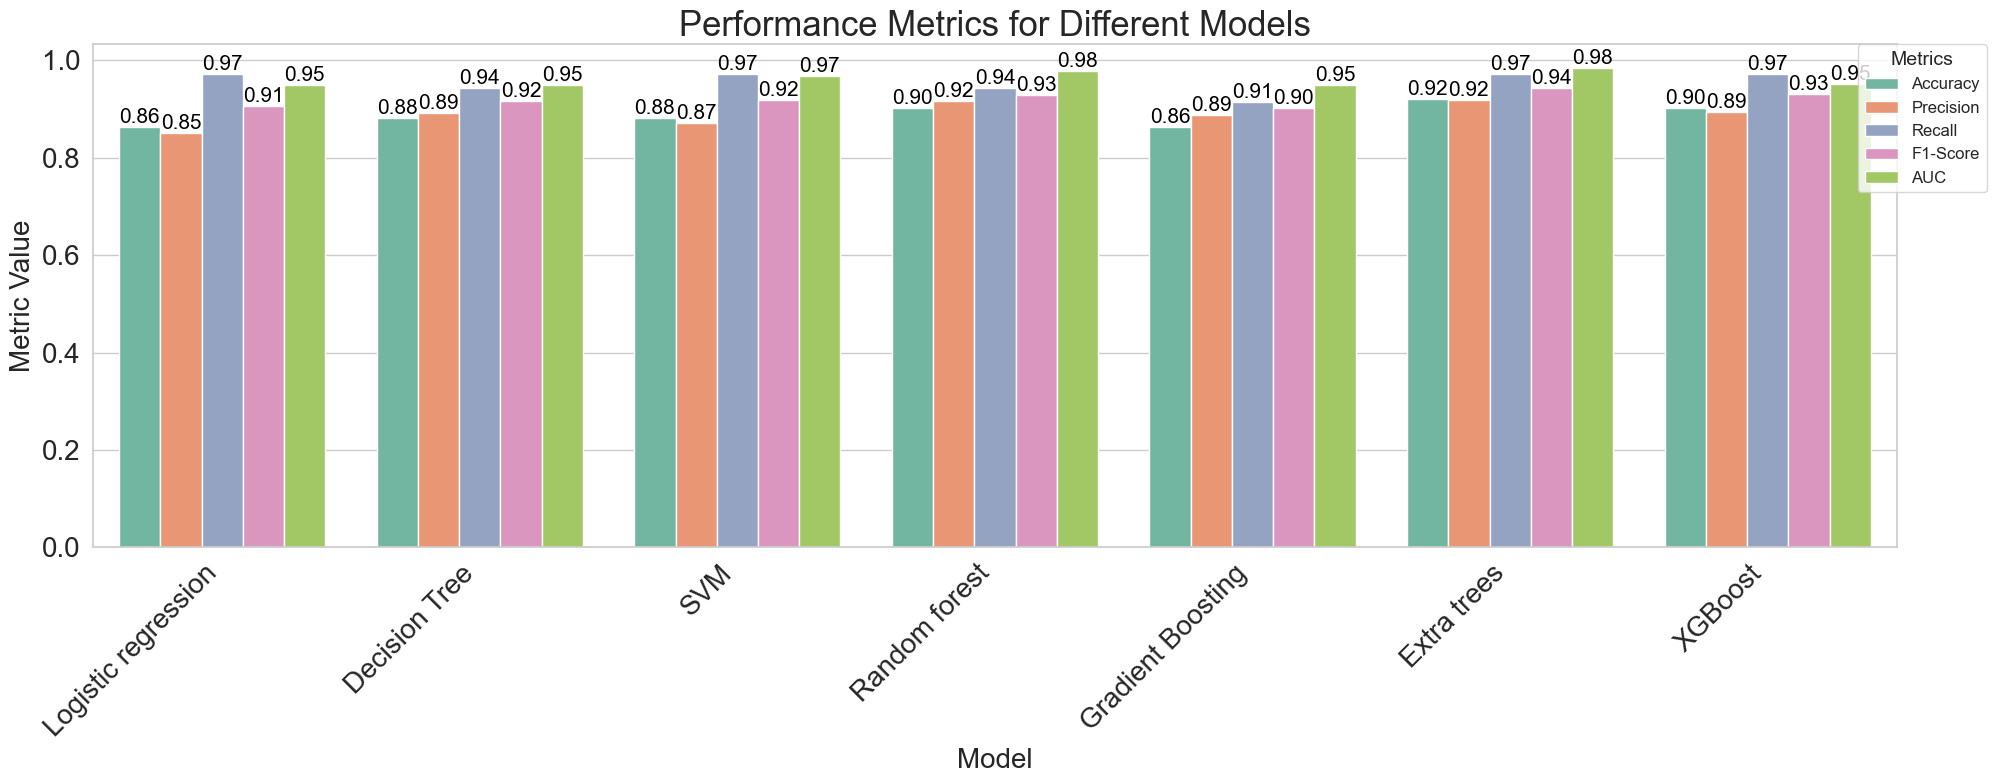

In [58]:
# Set the style for the plot
sns.set(style="whitegrid")
# Convert the results DataFrame from wide format to long format for easy plotting with Seaborn
metrics_long = results.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],var_name='Metric', value_name='Value')
# Create a barplot
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="Model", y="Value", hue="Metric", data=metrics_long, palette="Set2")
# Annotate the bars with their respective values (higher precision)
for p in ax.patches:
    value = p.get_height()
    if value > 0:  # Annotate only if the value is greater than 0
        ax.annotate(f'{value:.2f}',  # Use 4 decimal places for better precision
                    (p.get_x() + p.get_width() / 2., value),  
                    ha='center', va='bottom', fontsize=15, color='black')
# Set plot title and labels with larger fonts
plt.title('Performance Metrics for Different Models', fontsize=25)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Metric Value', fontsize=20)
# Rotate x-axis labels for better readability and increase their font size
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
# Set the legend with larger font size
plt.legend(title='Metrics', loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=12, title_fontsize=14)
# Adjust layout for better appearance
plt.tight_layout()
# Show the plot
plt.show()

#### Key Insights:
##### Even Distribution: 
The percentages for all metrics are nearly equal among the models, indicating minimal performance differences.
##### Gradient Boosting and Logistic Regression: 
These models slightly lag compared to Random Forest/Extra Trees in some metrics.
##### Top Performers: 
Random Forest and Extra Trees slightly outperform others in most metrics.

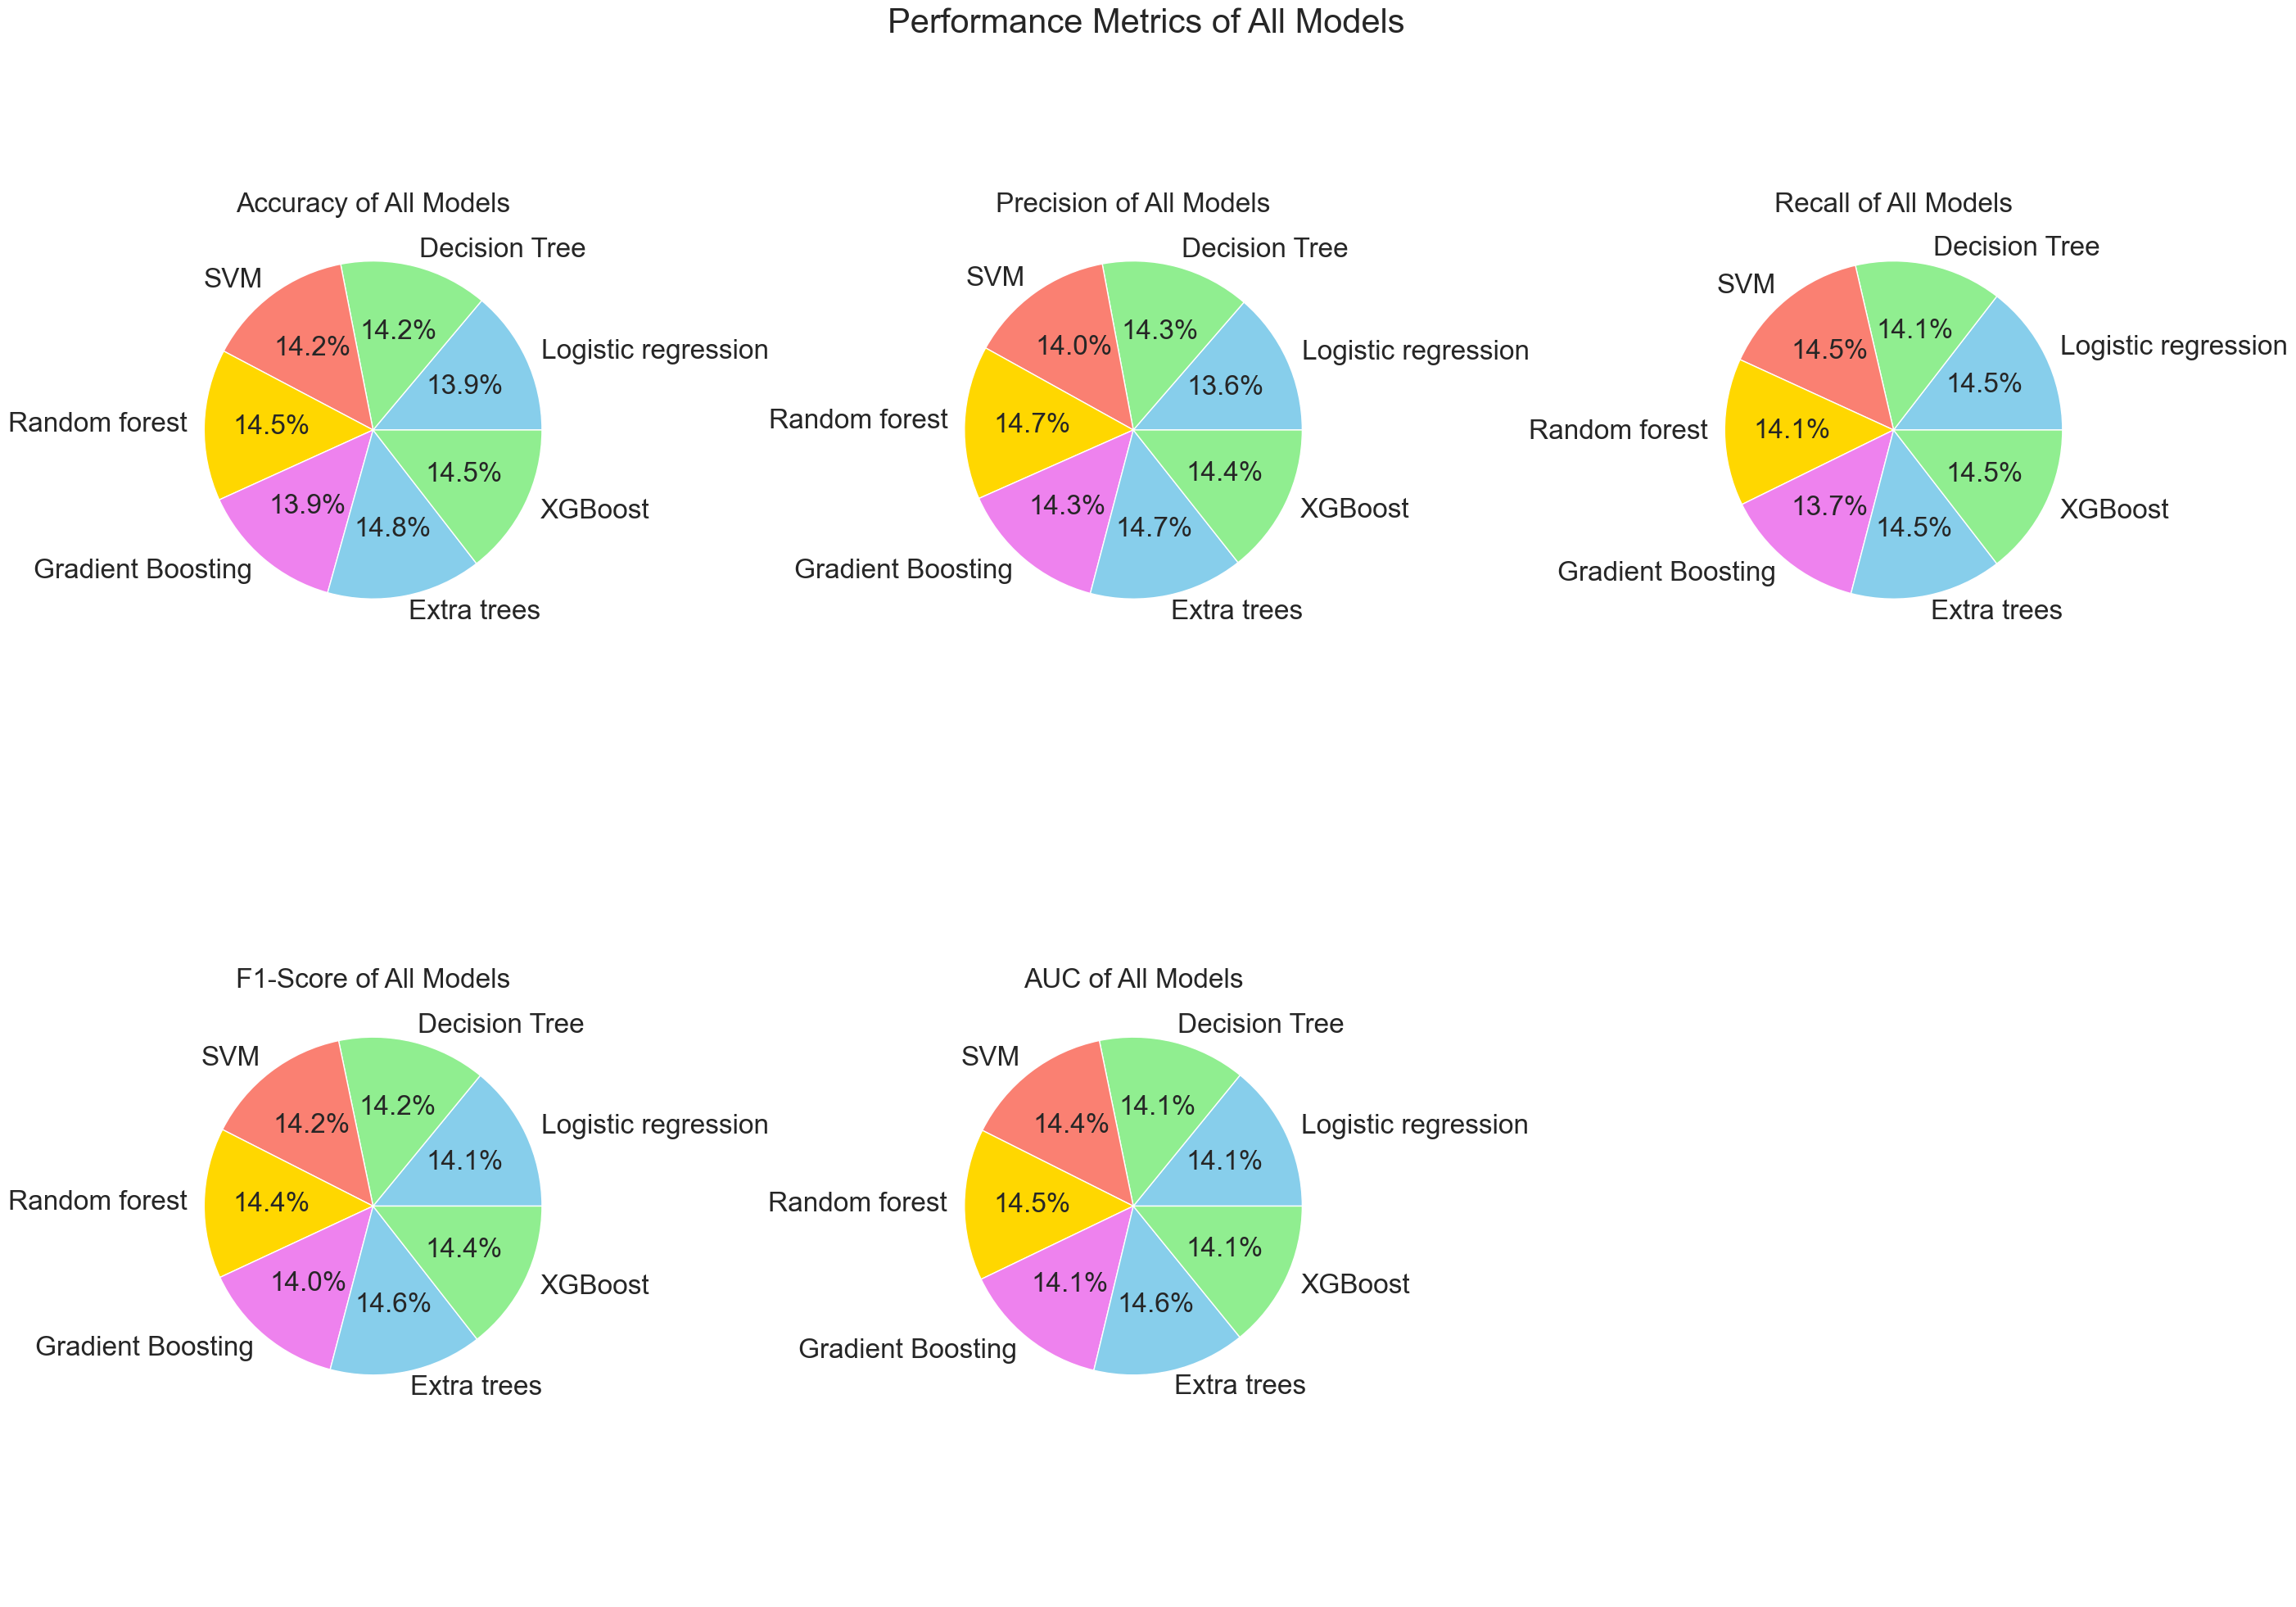

In [59]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet']
# Extract the performance scores for each metric and the model names
scores = results[metrics].values
models = results['Model']
fig, axes = plt.subplots(2, 3, figsize=(28, 20))
for i, metric in enumerate(metrics):
    row = i // 3  
    col = i % 3   
    ax = axes[row, col]
    metric_scores = scores[:, i]
    # Create a pie chart for the current metric
    ax.pie(metric_scores, labels=models, autopct='%1.1f%%', colors=colors, 
           textprops={'fontsize': 24})  # Add labels and percentage display
    ax.set_title(f"{metric} of All Models", fontsize=24)  # Set the title for the pie chart
# Extract the AUC scores and create a pie chart for them in the last subplot
auc_scores = results['AUC'].values
ax_auc = axes[1, 1]  
ax_auc.pie(auc_scores, labels=models, autopct='%1.1f%%', colors=colors, 
           textprops={'fontsize': 24})  # AUC pie chart
ax_auc.set_title("AUC of All Models", fontsize=24)  # Set the title for the AUC chart
axes[1, 2].axis('off') 
plt.suptitle("Performance Metrics of All Models", fontsize=30)
plt.tight_layout()
plt.show()

#### Model Selection
Extra Trees stand out as the most promising models due to their strong performance across all metrics. These model would likely be the preferred choices for a classification problem.So, I would like to choose Extra trees model.

Here are the reasons to choose the Extra Trees model:

##### 1. Superior Performance Across Metrics:
F1-Score: Extra Trees has the highest F1-Score (0.944444), indicating a strong balance between Precision and Recall. This makes it ideal if both false positives and false negatives are critical.
Accuracy: Extra Trees achieves the highest Accuracy (0.921569), meaning it correctly classifies more instances overall compared to other models.
AUC: Extra Trees has the highest AUC (0.983929), reflecting excellent performance in distinguishing between classes, even with imbalanced datasets.

##### 2. High Precision and Recall:
Precision: (0.918919) indicates that Extra Trees has a lower tendency to classify false positives compared to other models.
Recall: (0.971429) ensures most of the positive cases are correctly identified, which is crucial in applications like medical diagnoses or fraud detection.

##### 3. Balanced Model Complexity:
Extra Trees is computationally more efficient than Gradient Boosting and XGBoost because it builds trees randomly and independently, making it faster to train.
It also avoids overfitting better than a traditional Decision Tree, thanks to its random feature splitting strategy.

##### 4. Robustness to Overfitting:
Extra Trees uses randomized splits and bootstrapping, making it robust to overfitting, especially in high-dimensional datasets or noisy data.

##### 5. Scalability:
It scales well to large datasets while maintaining high performance.

##### Final Verdict:
Extra Trees offers a strong combination of accuracy, robustness, and computational efficiency, making it the best choice if optimal model performance is the primary goal.